# How to use the superposers

In [1]:
import sys
sys.path.append('../')
import qreative

### `bitstring_superposer`

Information can be represented as bit strings. These can then be encoded into qubits: simply use one qubit for each bit in the string and set its value to `0` or `1` as required.

With qubits, we can also create superpositions of bit strings, which is exactly what is done by this function. It takes list of two bit strings as an argument, and then encodes and superposes them.

When the superposition of bit strings is measured, the result will be randomly chosen from the strings being superposed.

In [2]:
stats = qreative.bitstring_superposer(['0000','0101'],shots=1)

In [3]:
print("    Random string from superposition: ",list(stats.keys())[0])

    Random string from superposition:  0101


To see what the probabilities are for each outcome, we can repeat the process many times and caculate the fraction of runs for which each result occurs. For this we can set a high value for the shots kwarg, or just use its default value of shots=1024.

In [4]:
stats = qreative.bitstring_superposer(['0000','1111'])
print("    Strings and their fractions:       ",stats)

    Strings and their fractions:        {'1111': 0.5224609375, '0000': 0.4775390625}


If you don't want a 50/50 split, you can use the `bias` qwarg. This should be set to a value between $0$ and $1$, and will give the corresponding bias to the first listed bit string. For example, we can change the command used above to give an 80% bias towards `'0000'`.

In [5]:
stats = qreative.bitstring_superposer(['0000','1111'],bias=0.8)
print("    Strings and their fractions:       ",stats)

    Strings and their fractions:        {'1111': 0.1806640625, '0000': 0.8193359375}


Another possibility is to create a superposition of an entire set of bit strings, rather than just two. For example, we could include all four two-bit strings in our list.

In [6]:
stats = qreative.bitstring_superposer(['00','01','10','11'],bias=0.8)
print("    Strings and their fractions:   ",stats)

    Strings and their fractions:    {'10': 0.228515625, '01': 0.248046875, '11': 0.2724609375, '00': 0.2509765625}


Note that this only works when all possible strings of a certain length are used. Otherwise, only the first two bit strings in the list will be superposed.

In these example, we just got out dictionary of measurement results. Since that isn't the most exciting thing in the world, the next few functions use `bitstring_superposer` to make things that are more appealing.

### `emoticon_superposer`

Thanks to the ASCII standard, we have a well defined way of assigning bit strings to letters, numbers and punctuation. For example, you can express `;)` as `01110110101001`, if you were so inclined.

Given two strings of letters, numbers and punctuation, the `emoticon_superposer` creates and analysis the superposition, and visualizes the results. Note that only strings of length 2 are supported (so you can do `:D` but not `:-D`).

For example, let's superpose `;)` and `8)`.

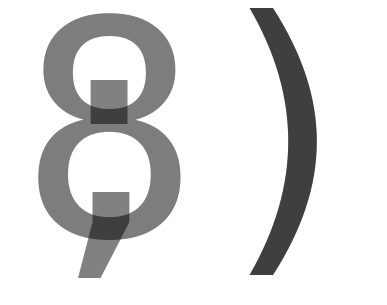

In [4]:
stats = qreative.emoticon_superposer([';)','8)'])

The fractions of runs for which each emoticon occured is also output, in case you want it for some reason.

In [8]:
print("    Emoticons and their fractions:       ",stats)

    Emoticons and their fractions:        {';)': 0.494140625, '8)': 0.505859375}


The image is composed of all the emoticons found in the results, with the alpha channel of each set such that the emoticons for the most probable strings appear the strongest.

The kwargs include the standard `device='qasm_simulator'` and `shots=1024`. There is also `encoding=7`, which determines the length of the bit strings used for the ASCII encoding. For two characters, 2x`encoding` qubits are required. The default value of 7 is therefore the maximum that cane be done on publicly available hardware, given that the largest device is the 14 qubit `'ibmq_16_melbourne'`. When running on this device, noise will mean that spurious results will appear on some runs, resulting in spurious emoticons appearing in the final image.

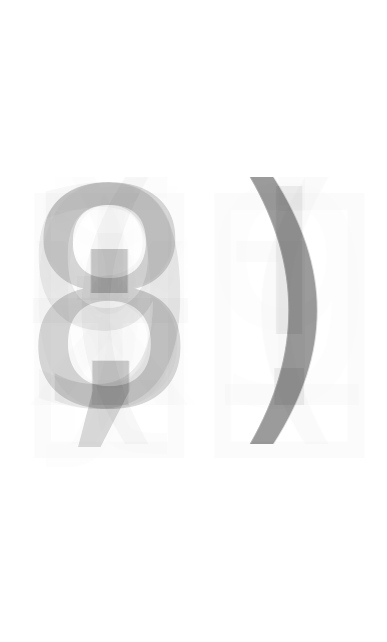

In [9]:
stats = qreative.emoticon_superposer([';)','8)'],device='ibmq_16_melbourne')

It is also possible to submit multiple jobs at once. So instead of just using a list of strings (like `[';)','8)']`) as the input, you could use a list of such lists (like `[ [';)','8)'] , [':D','8|'] ]` )

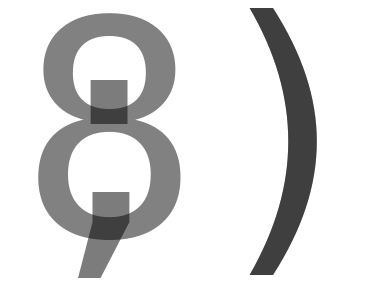

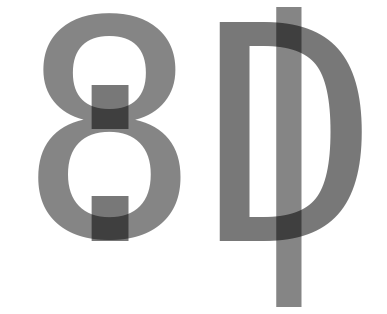

In [6]:
stats = qreative.emoticon_superposer([ [';)','8)'] , [':D','8|'] ])

The fractions for which emoticons occured are then returned as a corresponding list of dictionaries, instead of just a single dictionary as for a single job.

In [12]:
print(stats)

[{';)': 0.525390625, '8)': 0.474609375}, {':D': 0.5078125, '8|': 0.4921875}]


This functionality is especially useful when using a real device. This is because the jobs are submitted as a batch, and so you don't need to repeatedly wait in the queue to use the device. It is also available for `bitstring_superposer` and `image_superposer`.

This function was inspired by a superposition of emoticons made as a kind of quantum 'Hello World'. For more on this, see [here](https://medium.com/qiskit/making-a-quantum-computer-smile-cee86a6fc1de).

### `image_superposer`

The `image_superposer` function does much the same as the `emoticon_superposer`, but using more general images. There are two main arguments, each of which should contain a list of filenames for png files in the local images folder. The first describes a set of images from which the superposed images will be chosen. With this we define a binary encoding for the set of images, assigning a unique binary string to each.

The second specifies the images to be superposed. This should either contain exactly two filenames, or it contain all the filenames within the first list. This is because only two types of superposition are currently supported: those of two images, or those of all images within a set.

When the `backend='local_qasm_simulator'` kwarg is changed to a real device, noise will result the appearence of other images than those involved in the superposition. These will be from the larger set specified from the first list. The `shots=1024` is also present, doing its usual thing.

[{'moth': 0.498046875, 'heron': 0.501953125}, {'butterfly': 0.505859375, 'moth': 0.494140625}]


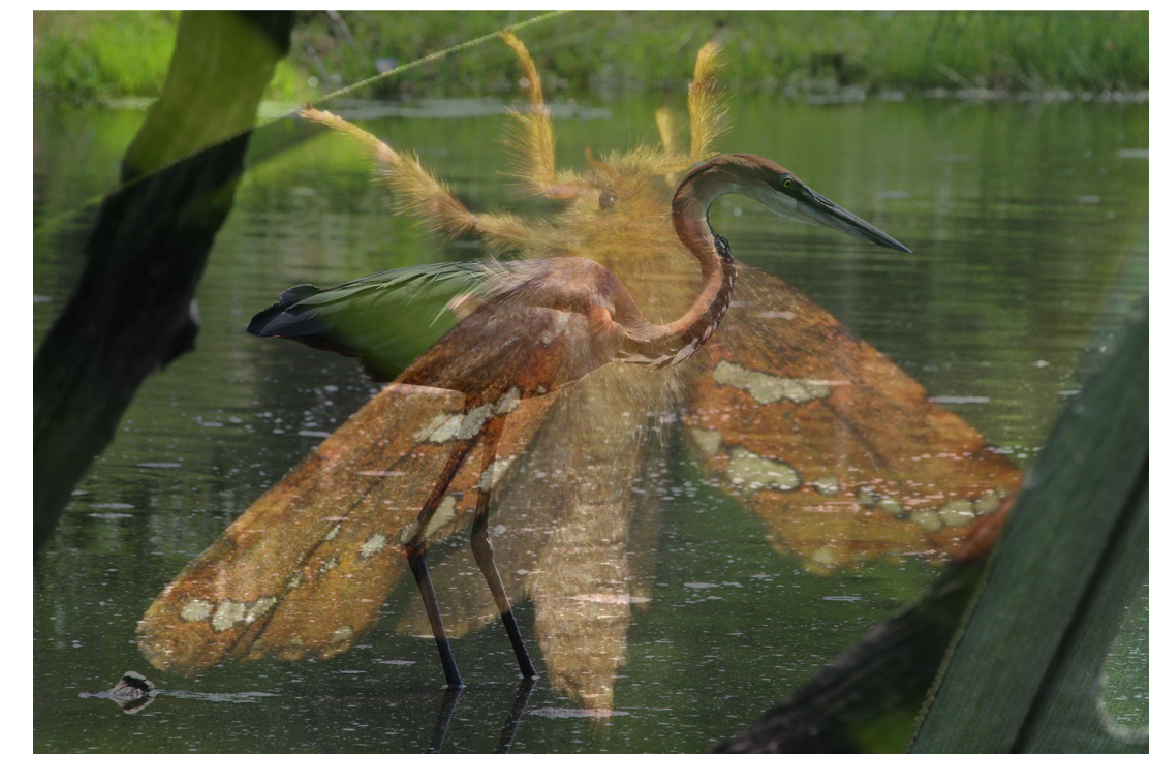

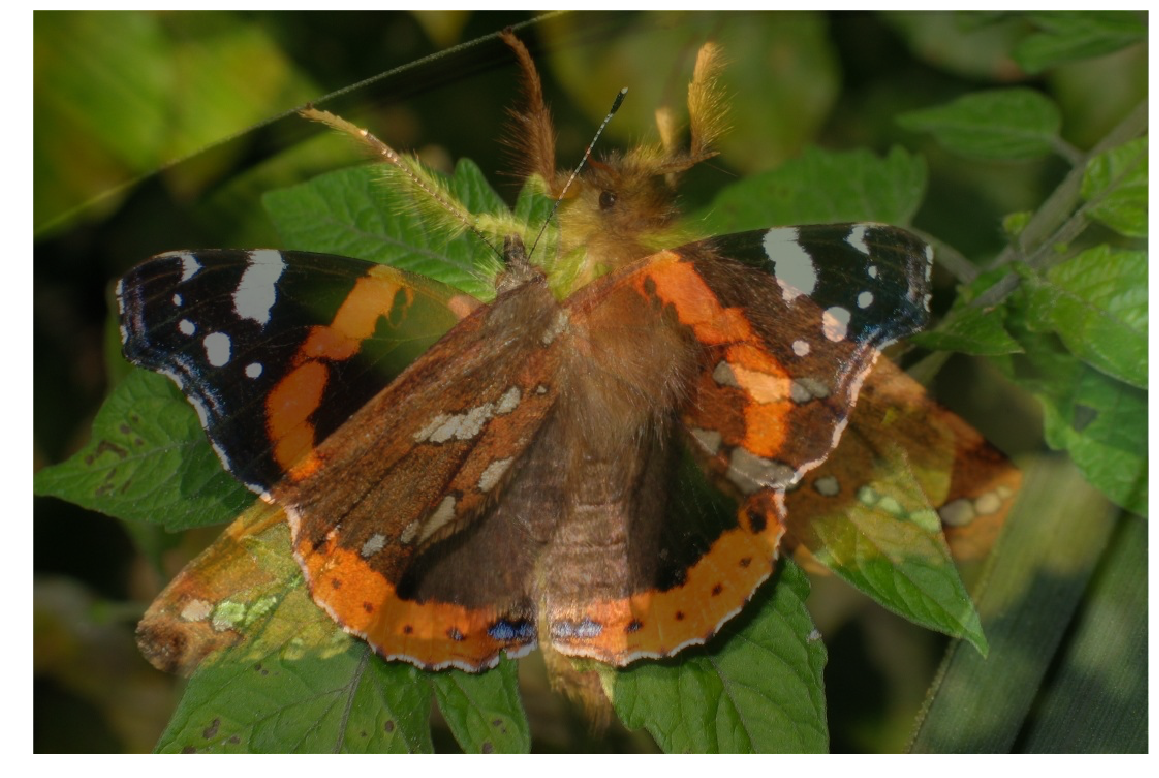

[{'moth': 0.498046875, 'heron': 0.501953125},
 {'butterfly': 0.505859375, 'moth': 0.494140625}]

In [3]:
qreative.image_superposer(['butterfly','moth','heron'],[['moth','heron'],['moth','butterfly']])

This function was inspired by part of the command line version of the [Hello Quantum](http://helloquantum.mybluemix.net/) project. You can read more about that image superposer [here](https://medium.com/qiskit/a-quantum-superposition-of-a-tiger-and-a-bear-b461e3b23908).

### `audio_superposer`

Much the same as the superposer for images, there's also one for audio. Again, supply lists of filenames. The final output audio will be placed in the local *outputs* folder.

By default, the input and output files should be in *.wav* format. You can also use anything else [supported by ffmpeg](http://www.ffmpeg.org/general.html#File-Formats) by setting the format `kwarg`. For example, `kwarg='mp3'` for mp3.

In [2]:
import sys
sys.path.append('../')
import qreative
qreative.audio_superposer(['8bit_Dungeon_Level','Bit_Quest','8bit_Dungeon_Boss','Bit_Shift'],['8bit_Dungeon_Level','Bit_Quest'])

[{'8bit_Dungeon_Level': 0.501953125, 'Bit_Quest': 0.498046875}]

This is based on the [Laurel or Yanny](https://github.com/Qiskit/qiskit-tutorials/blob/master/community/hello_world/laurel_or_yanny.ipynb) notebook from the Qiskit tutorials.